# Filtro da Mediana: implementação e discussões

## Introdução

Assim como o filtro da média, o filtro da mediana é um filtro passa-baixa que promove atenuação em transições com frequência abaixo da frequência de corte do filtro, causando um borramento na imagem. Porém, sua operação é não linear, por utilizar um operador estatístico, a mediana.

Sua operação não consiste na convulação discreta de sinais bi-dimensionais, mas sim no cálculo da mediana em uma região de interesse, chamada de máscara.

## Implementação (Código fonte)

Importação dos pacotes utilizados para simulação:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as m
import navFunc as nf
from navFunc.cls import cls
from IPython.display import Image

Carregar imagem utilizando a função do OpenCV:

In [2]:
img = cv2.imread('lena.png',cv2.IMREAD_GRAYSCALE)

### Definições preliminares:
- Definir tamanho do kernel utilizado
- Definir número de aplicações do filtro

In [3]:
# Cria variavel do tipo struct (similar ao matlab):

Filter = nf.structtype()                

Filter.img = np.array(img)

Filter.imgSize = nf.structtype()
Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape

#################### Filtro da média
# Kernel def:

Filter.kernelSize = 3

# Número de aplicações do filtro
numAp = 1;

# Variável auxiliar para guardar a saída
U = np.zeros((numAp, Filter.imgSize.lin, Filter.imgSize.col))

### Aplicação efetida do método:

In [4]:
#############################################################################################
########### Method apllication:

for k in range(0, numAp):
    if k == 0:
        U[k,:,:] = nf.filterMedian(Filter)
        print(U[k, :, :])
    else:
        Filter.img = U[k-1,:,:]
        U[k, :, :] = nf.filterMedian(Filter)
        print(U[k,:,:])



################################
Process finished
Filter have been applied
################################
[[   0.   73.   73. ...,   39.   39.    0.]
 [  73.   73.   73. ...,   44.   45.   39.]
 [  73.   73.   73. ...,   44.   45.   44.]
 ..., 
 [ 228.  228.  235. ...,  102.  107.  107.]
 [ 224.  228.  228. ...,  102.  107.  107.]
 [   0.  224.  228. ...,   99.  102.    0.]]


### Exibir resultados:

- Imagem original:

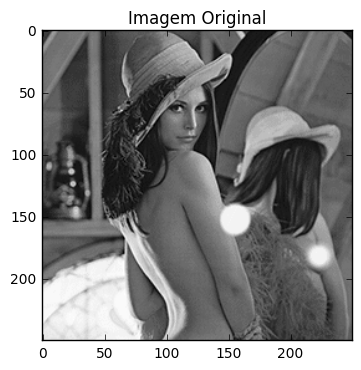

In [5]:
######### Using matplotlib #################
plt.figure(1)
plt.imshow(img, 'gray')
plt.title('Imagem Original')
plt.show()

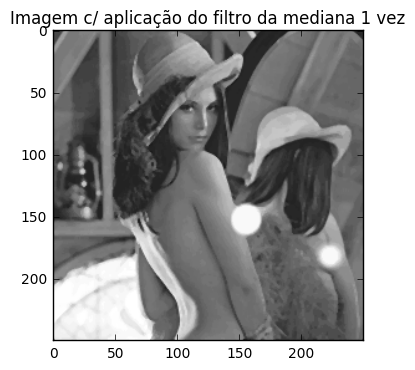

In [6]:
plt.figure(2)
plt.imshow(U[(numAp - 1),:,:], 'gray')
plt.title('Imagem c/ aplicação do filtro da mediana %d vez' %numAp)
plt.show()

#### Apêndice 01 - Função para cálculo do filtro da mediana:

In [7]:
def filterMedian (Filter):
    ### Imports
    import numpy as np
    import matplotlib.pyplot as plt
    import math as m
    import navFunc as nf

    # Load image into numpy matrix

    A = Filter.img

    size = nf.structtype()
    size.A = nf.structtype()
    size.A.lin, size.A.col = A.shape

    #################### Median filter
    ## Pre-set steps:
    Filter.kernel = np.ones((Filter.kernelSize, Filter.kernelSize))
    #################
    central = m.floor((Filter.kernelSize / 2))

    C = np.zeros((size.A.lin + central * 2, size.A.col + central * 2))
    C[(0 + central):(size.A.lin + central), (0 + central):(size.A.col + central)] = A

    #################
    ##  Run the kernel over the matrix (similar to convolution):
    #################
    buffer = np.zeros((Filter.kernelSize * Filter.kernelSize))
    D = np.zeros(A.shape)

    # for each line:
    for j in range((0), size.A.lin):
        # for each collumn:
        for k in range((0), size.A.col):
            # Run kernel in one matrix's elements
            ## for each line:
            for kl in range(0, Filter.kernelSize):
                ## for each collumn:
                for kk in range(0, Filter.kernelSize):

                    buffer[(Filter.kernelSize * kl + kk)] = (C[j + kl, k + kk])

            buffer = np.sort(buffer)
            value = buffer[int(np.floor((Filter.kernelSize**2)/2))]

            D[j, k] = value

    D = np.uint8(D)

    print('################################')
    print('Process finished')
    print('Filter have been applied')
    print('################################')

    return D

# Discussões sobre o método

Assim como o filtro da média, o filtro da mediana pode ser entendido como um filtro passa-baixa, pois atenua frequências maiores que a frequência de corte, dessa forma seus resultados são semelhantes, promovendo um borramento da imagem. Porém, nota-se que o borramento causado por este filtro é diferente, a característica por trás disso reside na sua operação não linear sobre a imagem(sinal).

Um exemplo comparativo entre as duas operações exibem as diferenças:


## Exemplo 01 - Operações dos filtro da media e mediana em um pixel e em uma imagem

- Definição da mascara:

In [8]:
kernelMean = np.ones((3,3))
print("Kernel para filtro da média:")
print(kernelMean)

kernelMedian = np.ones((3,3))
print("Kernel para filtro da mediana:")
print(kernelMedian)

Kernel para filtro da média:
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
Kernel para filtro da mediana:
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


- Definição do pixel e sua vizinhaça:

In [9]:
vizPixel = np.array([[150, 13, 200],
                     [20, 27, 39],
                     [50, 80, 90]])
print("Vizinhança ao redor do pixel de valor 27")
print(vizPixel)

Vizinhança ao redor do pixel de valor 27
[[150  13 200]
 [ 20  27  39]
 [ 50  80  90]]


- Aplicação do filtro da media e media sobre o pixel:

In [10]:
print("Valor do novo pixel submetido ao filtro da média:")
print(int(np.sum((vizPixel*kernelMean))/9))

print("Valor do novo pixel submetido ao filtro da mediana:")
buffer = np.sort(np.ravel(vizPixel*kernelMean))
int(buffer[int(np.floor(9/2))])

Valor do novo pixel submetido ao filtro da média:
74
Valor do novo pixel submetido ao filtro da mediana:


50

Após a aplicadação do filtro da média e medina o pixel de valor 27 foi substituido pelo valor 74 e 50 respectiamente. Este resultado mostra que o filtro da mediana atenuou melhor valores de transição altos, pontuais e próximos a vizinhança, preservando melhor o pixel original.

Esta caraterística confere ao uma boa capacidade em retirar inteferências em uma área menor que a área do kernel. Um exemplo de deste tipo de interferência é o ruído sal pimenta, que possui diversos pontos pequenos corrompendo a imagem, como exibe-se a seguir:

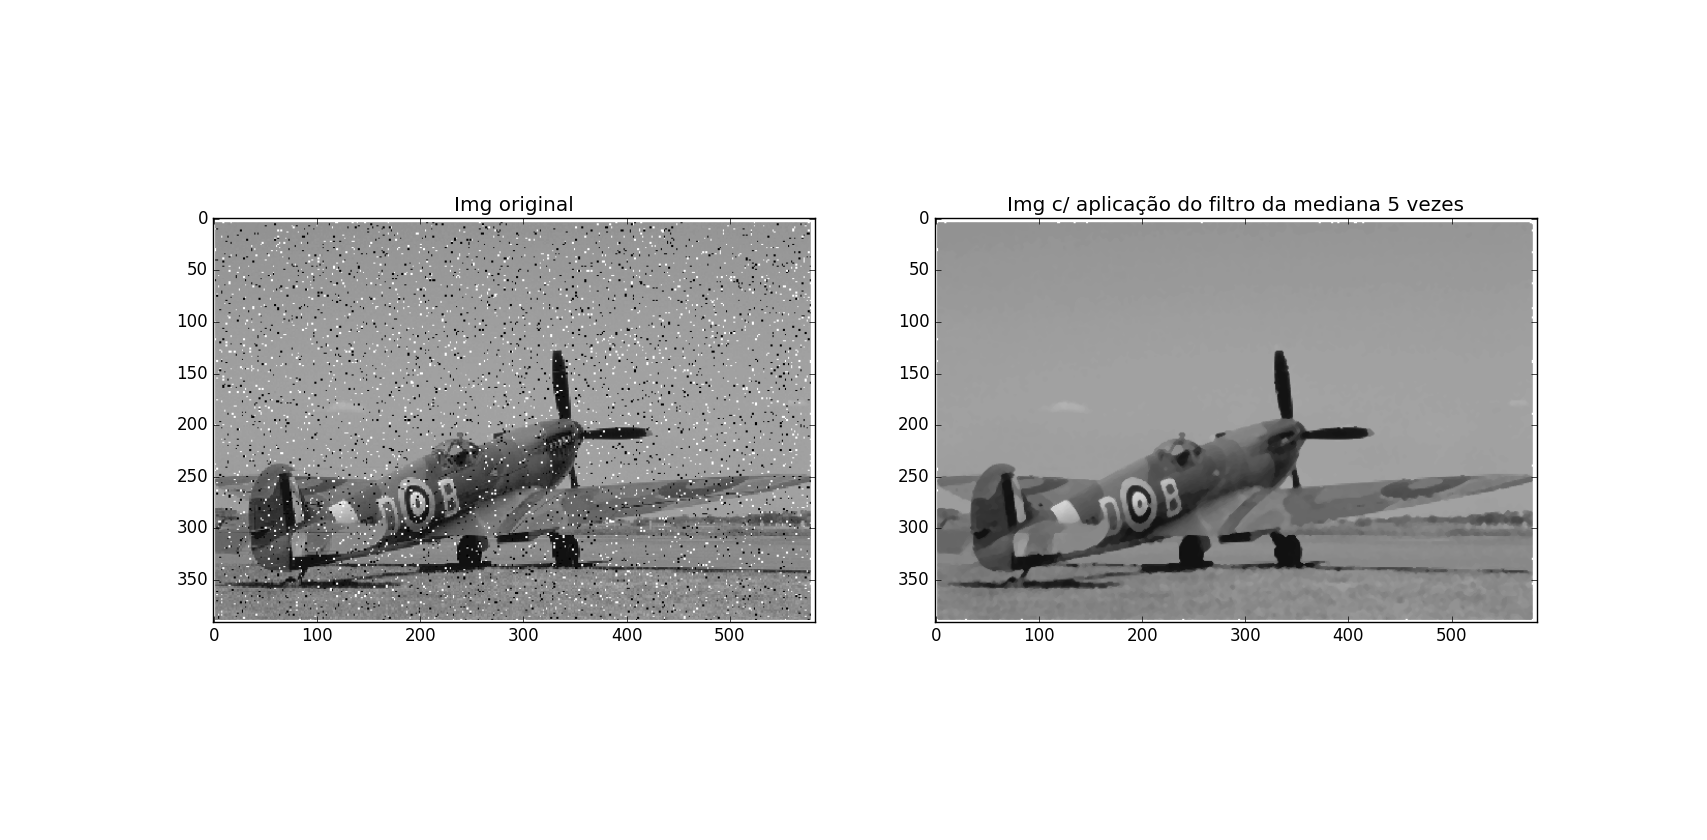

In [11]:
Image(filename='01-filterMedian.png')

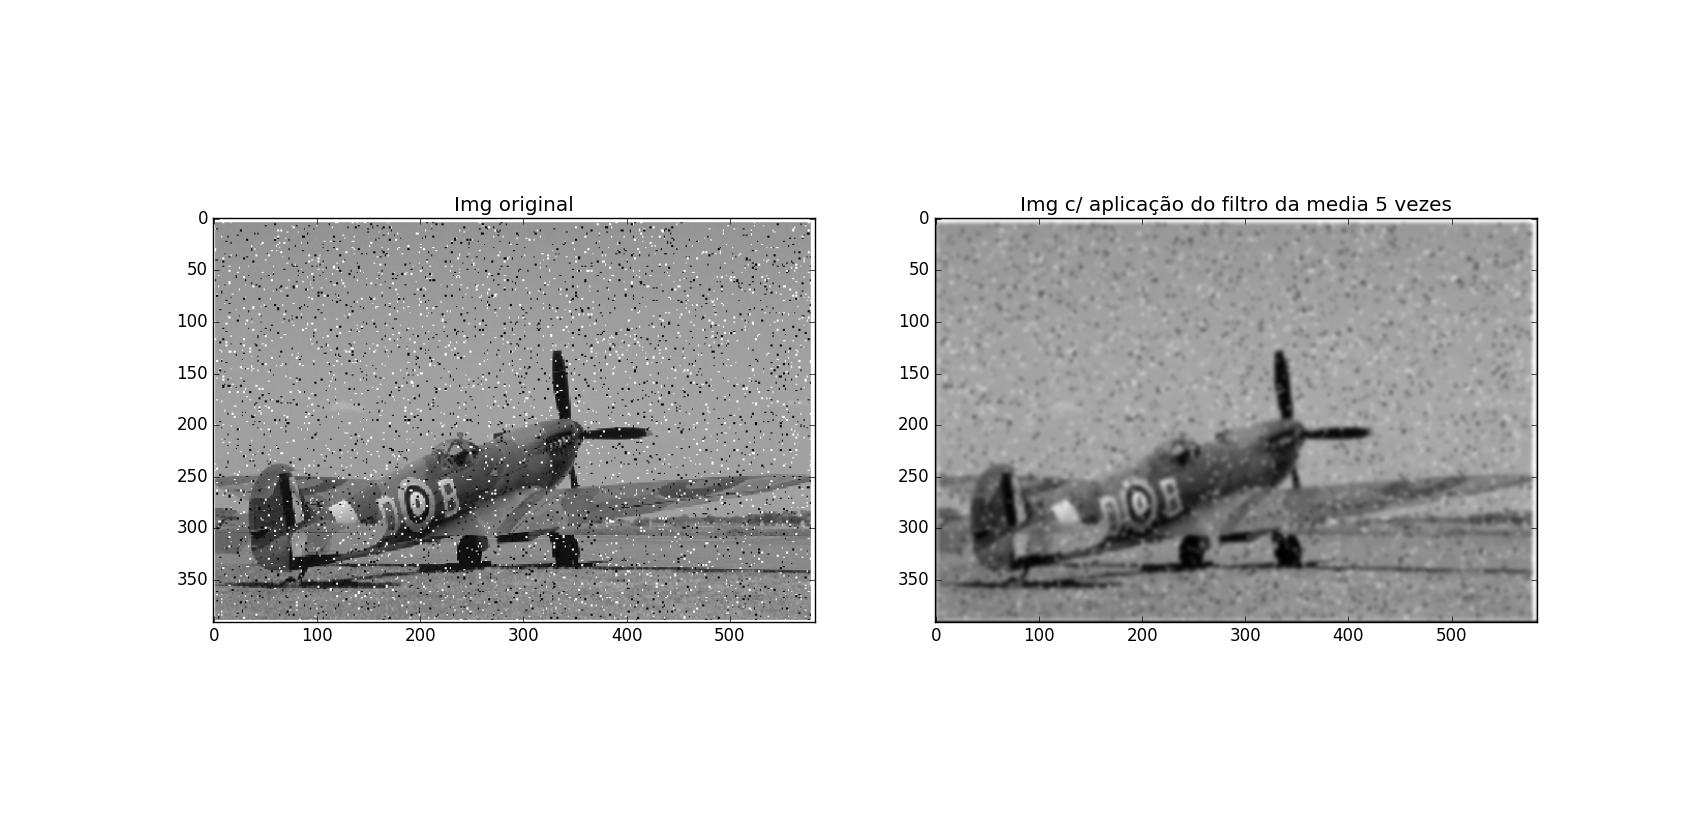

In [12]:
Image(filename='01-filterMean.png')

Enquanto que o filtro da mediana mostrou bastante eficas para retirar o ruído presente na imagem, o filtro da média foi bastante ineficaz, apenas borrando a imagem ainda mais.

Em suma, o filtro da medina pode ser bastante útil para retirar interferências pequenas e de alta frequência, enquanto o filtro da média atenua as transições entre uma região de alta frequência para baixa frequência.

## Quanto ao tamanho do kernel:

Submentendo uma imagem a uma variação do tamanho kernel constata-se o seguinte: assim como o filtro da média, máscaras maiores propiciam mais distorção na imagem, porém resultados diferentes. O filtro da medina "borra" com mais eficácia objetos menos que o seu tamanho, portando a utilização de um kernel 17x17 resultou em uma perca mairo que no filtro da média quando preocupa-se com imagem original.

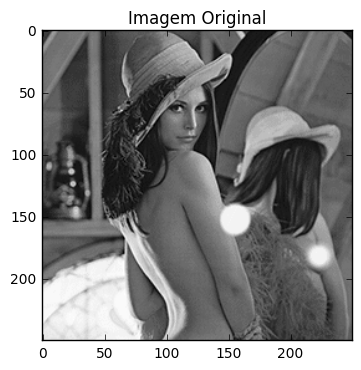

In [13]:
plt.figure(1)
plt.imshow(img, 'gray')
plt.title('Imagem Original')
plt.show()

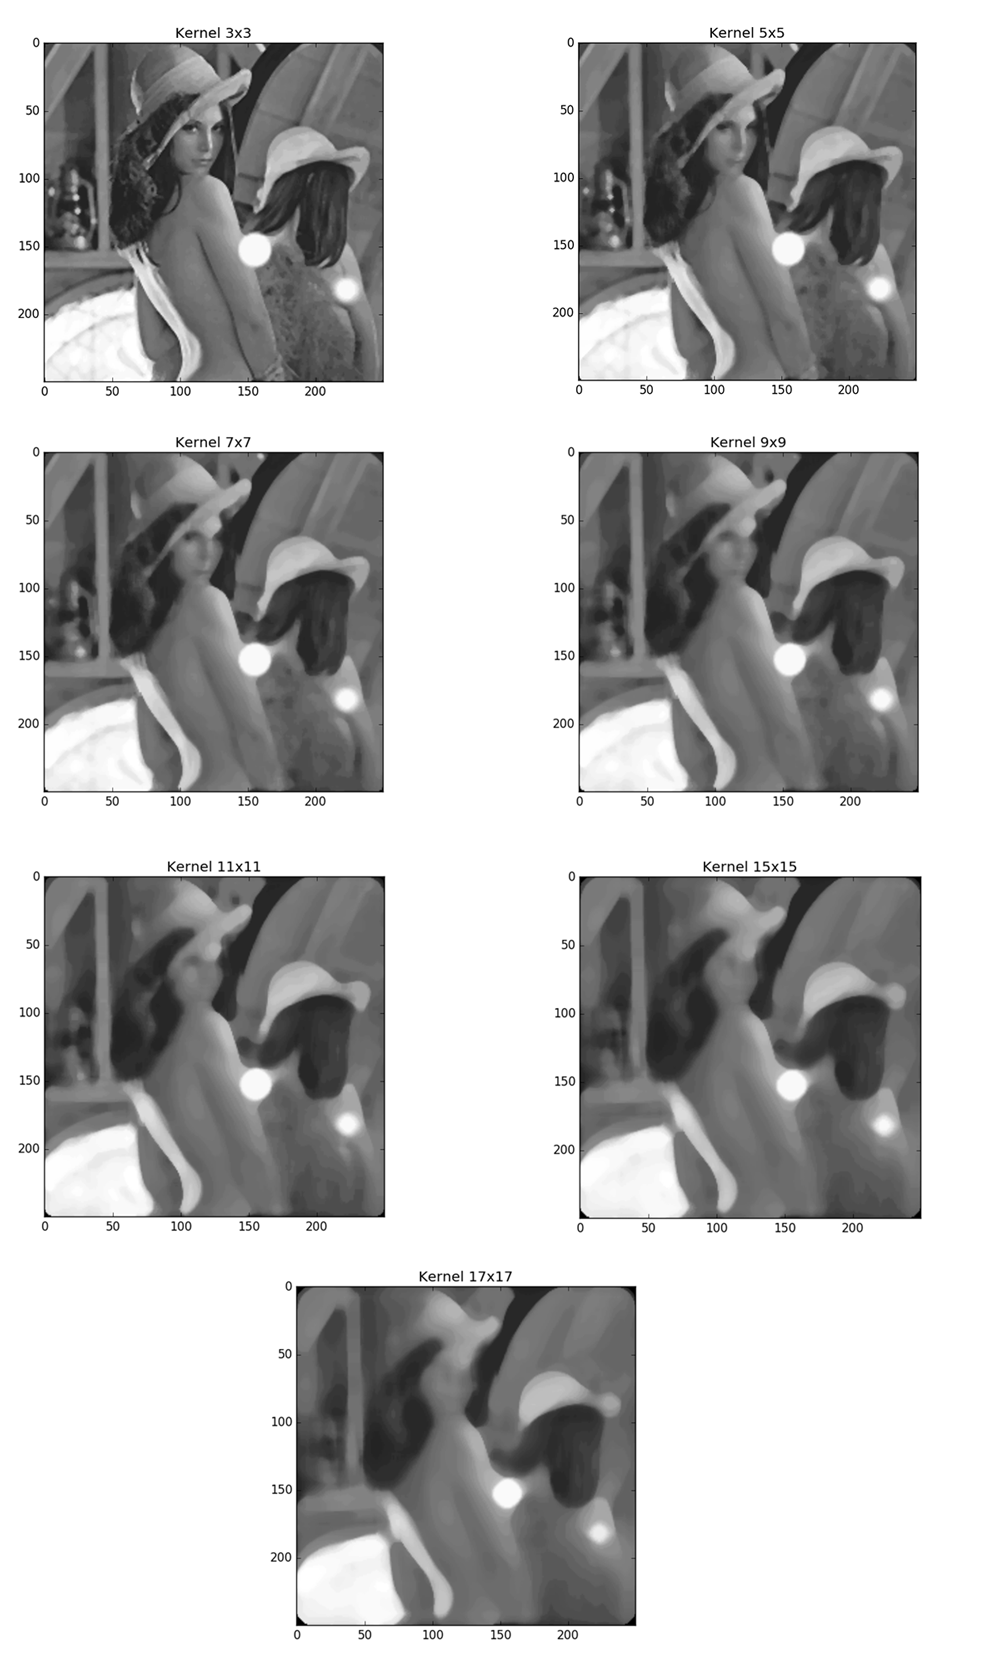

In [14]:
Image(filename='02.png')

## Quanto a aplicações sucessivas do filtro:

A imagem submetida concecutivamente ao filtro aprensenta menores perdas das características originais, diferente do filtro da média que tende a excluir os objetos menores, atenuando transições entre preto e branco, durante aplicações consecutivas.

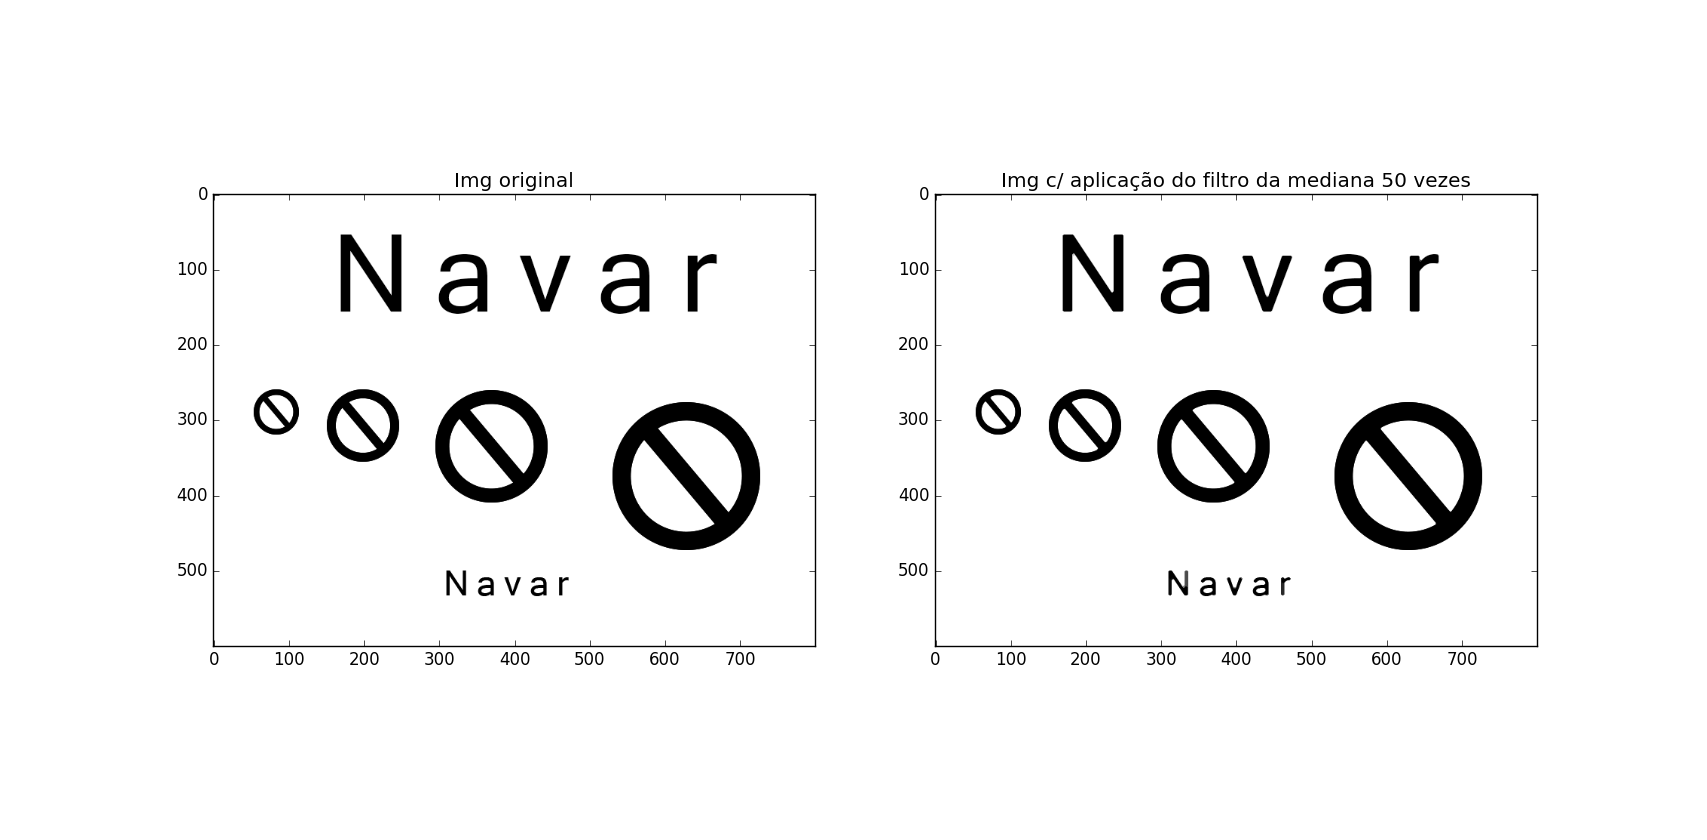

In [15]:
Image(filename='navar-filterMedian.png')

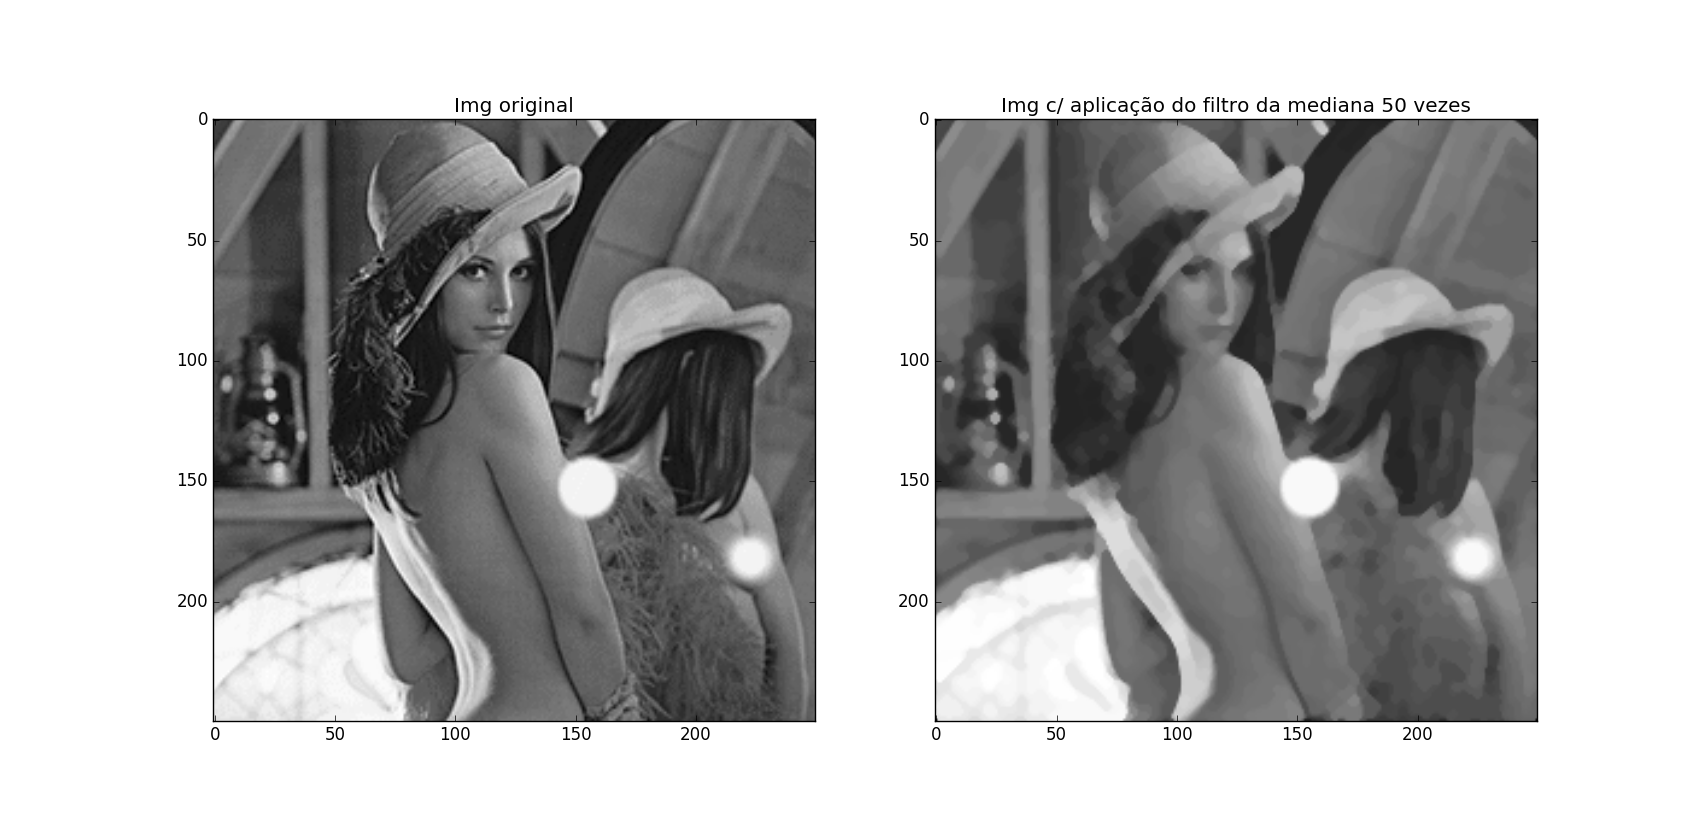

In [16]:
Image(filename='lena-filterMedian.png')

## Conclusões

Após operação do filtro da median o resultado é similar ao filtro da média, produz borramento, por ser um filtro passa-baixa. Porém, com ligerias diferenças, enquanto o filtro da media atenua transições abruptas como bordas e detalhes, o filtro da mediana tende a preserver melhor detalhes finos.

Quando utiliza-se máscaras maiores a caracaterísticas de preservação dos detalhes finos é praticamente perdida a ele opera como o filtro da média, borrando a imagem como um todo. Contudo, ele promove menos percas na imagem após aplicações sucessivas, devido ao fato do valor matemático da mediana ser menor suceptível a transformações do que a média aritmética.

A mesma característica da matemática da mediana torna-o eficaz, perante o média, na remoção de ruídos de alta frequência e pequena intensidade, como o sal-pimental.